In [3]:
import pandas as pd
from google.colab import drive
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

drive.mount("/content/drive",force_remount=True)
csv_file =  '/content/drive/My Drive/Colab Notebooks/ISI/events.csv'
df = pd.read_csv(csv_file)


Mounted at /content/drive


In [4]:
#Counting total integrity errors that occurred in the data
integrity_err_count = df['checksum__failure'].sum()
print("Total integrity errors ",integrity_err_count)
print(df.columns)

Total integrity errors  116
Index(['@timestamp', 'end__time', 'executable', 'job__type', 'user__remote',
       'execution__site', 'retry__attempt', '_type', 'local__dur',
       'actual__checksum', 'start__time', 'execution__hostname', '_id',
       'filename', 'expected__checksum', 'checksum__failure', '_index',
       'source__proto__host', 'source__id', 'submit__hostname', 'user__submit',
       'job__exitcode', 'origin_id', 'dest__proto__host', 'root_xwf__id',
       'job__id'],
      dtype='object')


In [5]:
#hosts where integrity error occurred mostly
top_integrity_err_exec_host = df.groupby(["execution__hostname"])["checksum__failure"].agg('mean').sort_values(ascending=False)#.filter(lambda x :x["checksum__failure"]!=0)
#top_integrity_err_exec_host =pd.DataFrame(index=top_integrity_err_exec_host.index,values=top_integrity_err_exec_host)
top_integrity_err_exec_host

execution__hostname
workflow.isi.edu     0.044280
compute-1.isi.edu    0.037559
shrek.isi.edu        0.032454
compute-3.isi.edu    0.029240
compute-4.isi.edu    0.017391
compute-7.isi.edu    0.015327
compute-2.isi.edu    0.012422
mimir.isi.edu        0.011765
compute-6.isi.edu    0.009236
compute-5.isi.edu    0.007463
bamboo.isi.edu       0.000000
Name: checksum__failure, dtype: float64

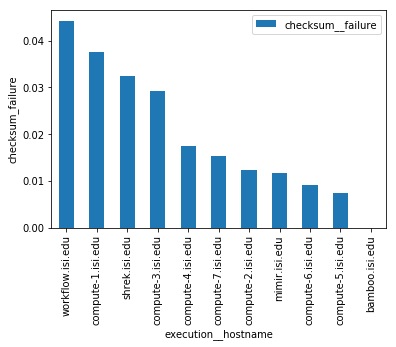

In [6]:
top_integrity_err_exec_host.plot.bar()
import matplotlib.pyplot as plt  
# # plot between 2 attributes 


plt.xlabel("execution__hostname") 
plt.ylabel("checksum_failure") 
plt.legend()
plt.show() 

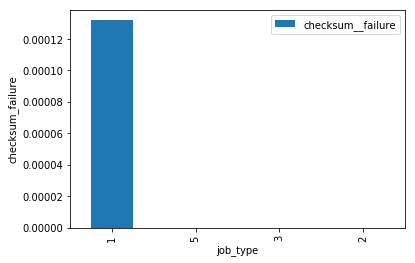

In [7]:

#job types where integrity errors occurred
top_integrity_err_jobtype = df.groupby(["job__type"])["checksum__failure"].agg('mean').apply(lambda x:x/integrity_err_count).sort_values(ascending=False)#.filter(lambda x :x["checksum__failure"]!=0)
top_integrity_err_jobtype.plot.bar()
import matplotlib.pyplot as plt  
# # plot between 2 attributes 


plt.xlabel("job_type") 
plt.ylabel("checksum_failure") 
plt.legend()
plt.show() 

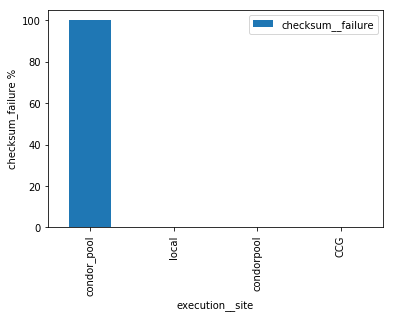

In [8]:
#execution sites where integrity errors occurred
top_integrity_err_jobtype = df.groupby(["execution__site"])["checksum__failure"].agg('sum').apply(lambda x:x/integrity_err_count*100).sort_values(ascending=False)#.filter(lambda x :x["checksum__failure"]!=0)
top_integrity_err_jobtype.plot.bar()
import matplotlib.pyplot as plt  
# # plot between 2 attributes 


plt.xlabel("execution__site") 
plt.ylabel("checksum_failure %") 
plt.legend()
plt.show() 

In [9]:
top_integrity_err_root = df.groupby(["filename","actual__checksum","execution__hostname"])["checksum__failure"].agg('sum').reset_index().sort_values(by = ["checksum__failure"],ascending = False)#.filter(lambda x :x["checksum__failure"]!=0)
top_integrity_err_root = top_integrity_err_root[top_integrity_err_root["checksum__failure"]>0]
top_integrity_err_root

,filename,actual__checksum,execution__hostname,checksum__failure
87,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,shrek.isi.edu,9
84,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,compute-6.isi.edu,8
85,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,compute-7.isi.edu,6
88,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,workflow.isi.edu,5
86,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,mimir.isi.edu,3
80,keg,c32f0fcafa766cd79f6d9aef720665322b921095f6aa45...,compute-1.isi.edu,2
55,1-46-2.data,eb3e4ece28d95cf2b2ef144f8f1996c92be7ea3993acf3...,compute-1.isi.edu,1
62,1-5-2.data,ffcb0561e1eea75000fdd79b736acd2cb7641d9cda783c...,compute-1.isi.edu,1
61,1-5-1.data,c1a276bb9a230d6580d29e0bdebab5895aa855761fc2da...,compute-6.isi.edu,1
60,1-49-2.data,ffcb0561e1eea75000fdd79b736acd2cb7641d9cda783c...,compute-7.isi.edu,1


In [0]:
#for each workflow what are the execution hosts where integrity errors occurred
top_integrity_err_exec_host = df.groupby(['root_xwf__id',"execution__hostname"])["checksum__failure"].agg('sum').reset_index().sort_values(by = ["root_xwf__id","checksum__failure"],ascending = False)#.filter(lambda x :x["checksum__failure"]!=0)
top_integrity_err_exec_host = top_integrity_err_exec_host[top_integrity_err_exec_host["checksum__failure"]>0]

In [11]:
top_integrity_err_exec_host[:20]

,root_xwf__id,execution__hostname,checksum__failure
835,ef75c71f-c8b9-4011-9aea-953baabcd709,compute-7.isi.edu,7
834,ef75c71f-c8b9-4011-9aea-953baabcd709,compute-6.isi.edu,2
831,ef75c71f-c8b9-4011-9aea-953baabcd709,compute-2.isi.edu,1
722,ce9f7383-5929-4d00-a148-2febc58f0a8c,compute-1.isi.edu,2
727,ce9f7383-5929-4d00-a148-2febc58f0a8c,compute-7.isi.edu,2
730,ce9f7383-5929-4d00-a148-2febc58f0a8c,workflow.isi.edu,2
723,ce9f7383-5929-4d00-a148-2febc58f0a8c,compute-2.isi.edu,1
728,ce9f7383-5929-4d00-a148-2febc58f0a8c,mimir.isi.edu,1
729,ce9f7383-5929-4d00-a148-2febc58f0a8c,shrek.isi.edu,1
714,cd3b7c48-63a8-460b-a2f9-d3c2df42f175,compute-7.isi.edu,5


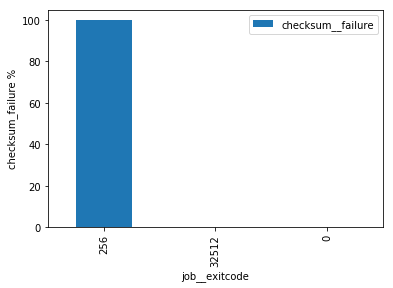

In [12]:
#job exit codes where integrity errors occurred
top_integrity_err_jobtype = df.groupby(["job__exitcode"])["checksum__failure"].agg('sum').apply(lambda x:x/integrity_err_count*100).sort_values(ascending=False)#.filter(lambda x :x["checksum__failure"]!=0)
top_integrity_err_jobtype.plot.bar()
import matplotlib.pyplot as plt  
# # plot between 2 attributes 


plt.xlabel("job__exitcode") 
plt.ylabel("checksum_failure %") 
plt.legend()
plt.show() 

In [0]:
!pip install kmodes

In [0]:
# objectdf=df.select_dtypes(include='object')
# df.loc[:,objectdf.columns]=objectdf.apply(lambda x : pd.factorize(x)[0])

In [0]:

#df.to_csv('/content/drive/My Drive/Colab Notebooks/ISI/processed_df.csv')

In [13]:
!pip install kmodes
import seaborn as sns

In [0]:
# df.fillna(0,inplace = True)

# df.to_csv('/content/drive/My Drive/Colab Notebooks/ISI/processed_df.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


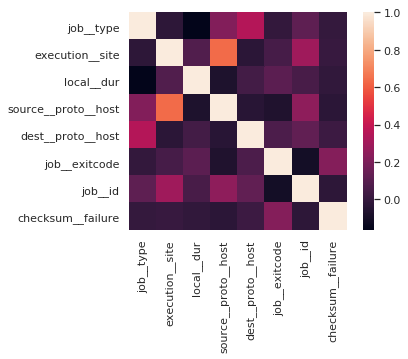

In [61]:
import numpy as np


#plotting heat map to compute correlation between different variables
Sum_of_squared_distances = []
costs= []
X = df[['job__type','execution__site','local__dur','source__proto__host','dest__proto__host','job__exitcode','job__id','checksum__failure']]
X.fillna(0,inplace=True)
X.loc[:,:]=X.apply(lambda x : pd.factorize(x)[0])   

cor = X.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True)


In [62]:
from kmodes import kmodes
from kmodes.util.dissim import matching_dissim
K = range(1,15)
#choosing subset of variables only
X = X[['job__type','execution__site','local__dur','source__proto__host','dest__proto__host','job__exitcode','job__id']]
kmodes_cao_k = []
for k in K:
    kmodes_cao = kmodes.KModes(n_clusters=k, init='Cao', verbose=1)
    kmodes_cao_k.append(kmodes_cao)
    kmodes_cao.fit_predict(X)
    labels,cost =  kmodes._labels_cost(X, kmodes_cao.cluster_centroids_,matching_dissim)
    costs.append(cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 67112.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 380, cost: 60493.0
Run 1, iteration: 2/100, moves: 0, cost: 60493.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2480, cost: 46242.0
Run 1, iteration: 2/100, moves: 79, cost: 46242.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 45158.0
Run 1, iteration: 2/100, moves: 0, cost: 45158.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 529, cost: 44775.0
Run 1, iteration: 2/100, moves: 0, cost: 44775.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2340, cost: 39058.0
Run 1, iteration:

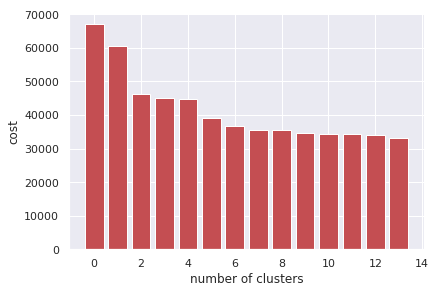

In [63]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.arange(len(costs))
plt.bar(indices, costs,color='r')
#choosing the optimal cost
plt.tight_layout()
plt.xlabel("number of clusters")
plt.ylabel("cost")
plt.show()

In [23]:
#  X = df[['job__type','execution__site','local__dur','source__proto__host','dest__proto__host','job__exitcode','job__id']]
# X.fillna(0,inplace=True)
X.loc[:,:]=X.apply(lambda x : pd.factorize(x)[0])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
y_kmodes = kmodes_cao_k[2].predict(X)
centroids = kmodes_cao_k[2].cluster_centroids_
labels= kmodes_cao_k[2].labels_

kmodes = pd.DataFrame(labels)
#X.insert((X.shape[1]),'kmodes',kmodes)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# scatter = ax.scatter(X['execution__site'],df1['checksum__failure'],
#                      c=kmeans[0],s=50)
# ax.set_title('K-Mod Clustering')
# ax.set_xlabel('execution__site')
# ax.set_ylabel('checksum__failure')
# plt.colorbar(scatter)

{3: 'local', 1: 'condor_pool', 2: 'condorpool', 0: 'CCG'}


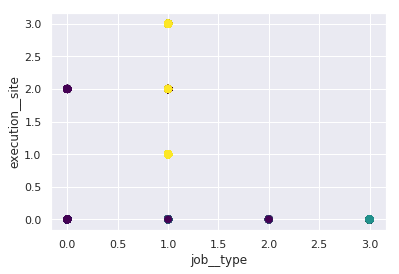

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig = plt.figure()
label_dict=df['execution__site'].astype('category')
label_dict = dict(zip(label_dict.cat.codes,label_dict))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmodes, s=50, cmap='viridis')
# ax.set_yticks(label_dict.keys())
# ax.set_yticklabels(label_dict.values())
ax.set_xlabel('job__type')
ax.set_ylabel('execution__site')
print(label_dict)
#plotting the clustering result 
#plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=200, alpha=0.5);

Text(0.5, 0, 'job__type')

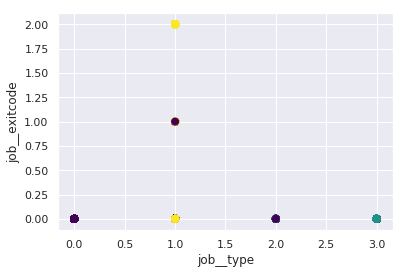

In [0]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 5], c=y_kmodes, s=50, cmap='viridis')
plt.ylabel('job__exitcode')
plt.xlabel('job__type')

In [67]:
checksum_centroids = {0:0,1:0,2:0}

df1 = df[['checksum__failure']]
print(df1.iloc[0,0])
for i in range(len(df)):
  
  if df1.iloc[i,0] == 1:
    checksum_centroids[labels[i]] += 1
                     
  
print(checksum_centroids)  
total_elements = []
for i in range(3):
  checksum_centroids[i] = checksum_centroids[i]
  total_elements.append(sum(labels==i))
  
for i in range(3):
  print("total events in cluster "+str(i),total_elements[i])
  print("total checksum failure events in the cluster "+str(i),checksum_centroids[i])


0
{0: 0, 1: 0, 2: 116}
total events in cluster 0 5870
total checksum failure events in the cluster 0 0
total events in cluster 1 2790
total checksum failure events in the cluster 1 0
total events in cluster 2 6898
total checksum failure events in the cluster 2 116
